In [1]:
df = read.csv("insurance.csv")
head(df)

age sex    bmi    children smoker region    charges  
1 19  female 27.900 0        yes    southwest 16884.924
2 18  male   33.770 1        no     southeast  1725.552
3 28  male   33.000 3        no     southeast  4449.462
4 33  male   22.705 0        no     northwest 21984.471
5 32  male   28.880 0        no     northwest  3866.855
6 31  female 25.740 0        no     southeast  3756.622

In [2]:
any(is.na(df))

[1] FALSE

In [3]:
outlier = function(dataset,x) {
  Q <- quantile(x, probs = c(0.25, 0.75), na.rm = FALSE)
  iqr <- IQR(x)
  up <- Q[2] + 1.5*iqr
  low <- Q[1] - 1.5*iqr
  eliminated <- subset(dataset, x > low & x < up)
  return(eliminated)
}

In [4]:
df = outlier(df, df$charges)
df = outlier(df, df$age)
df = outlier(df, df$bmi)

In [5]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1186        Min.   :15.96   Min.   :0.000  
 1st Qu.:26.00   Class :character   1st Qu.:25.76   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :29.70   Median :1.000  
 Mean   :38.98                      Mean   :29.90   Mean   :1.078  
 3rd Qu.:51.00                      3rd Qu.:33.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :45.43   Max.   :5.000  
    smoker             region             charges     
 Length:1186        Length:1186        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4419  
 Mode  :character   Mode  :character   Median : 8412  
                                       Mean   : 9958  
                                       3rd Qu.:12982  
                                       Max.   :34473  

In [6]:
str(df)

'data.frame':	1186 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


corrplot 0.84 loaded



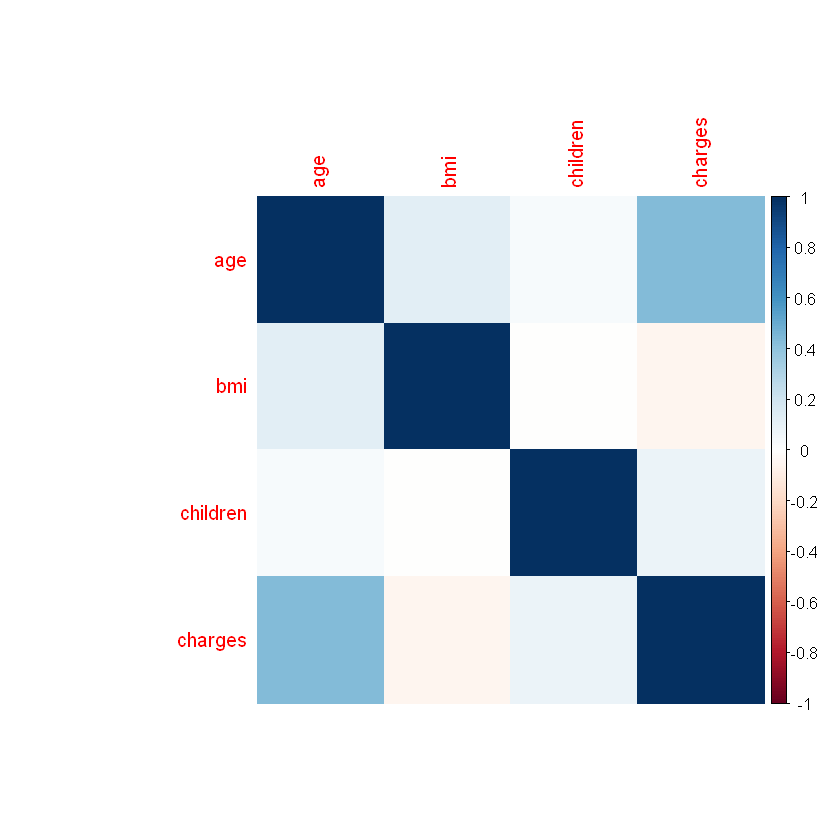

In [7]:
num.cols <- sapply(df, is.numeric)
cor.data <- cor(df[,num.cols])

library(corrplot)
corrplot(cor.data,method='color');

In [8]:
df = df[,num.cols]

In [9]:
library(caTools)
set.seed(101) 
sample <- sample.split(df$age, SplitRatio = 0.70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

In [10]:
model <- lm(charges ~ .,train)

In [11]:
summary(model)


Call:
lm(formula = charges ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6230.2 -3628.5 -2492.8  -558.9 29470.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6201.52    1283.93   4.830 1.62e-06 ***
age           238.95      15.51  15.406  < 2e-16 ***
bmi          -198.25      38.43  -5.158 3.11e-07 ***
children      305.49     178.53   1.711   0.0874 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6262 on 831 degrees of freedom
Multiple R-squared:  0.2379,	Adjusted R-squared:  0.2351 
F-statistic: 86.47 on 3 and 831 DF,  p-value: < 2.2e-16


In [12]:
coef(model)

(Intercept)         age         bmi    children 
  6201.5157    238.9500   -198.2501    305.4924

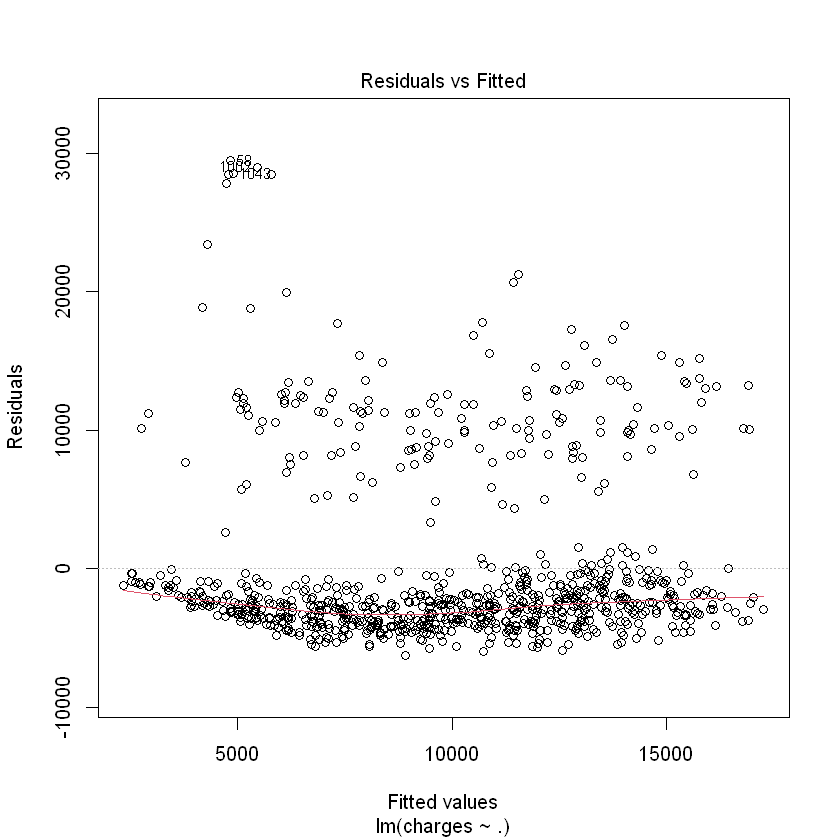

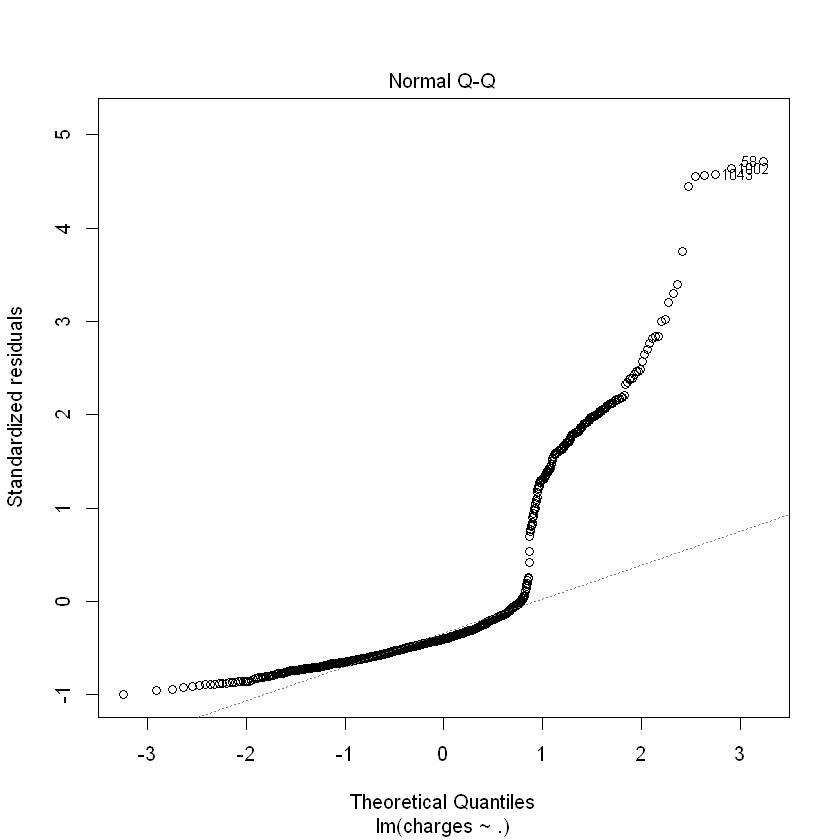

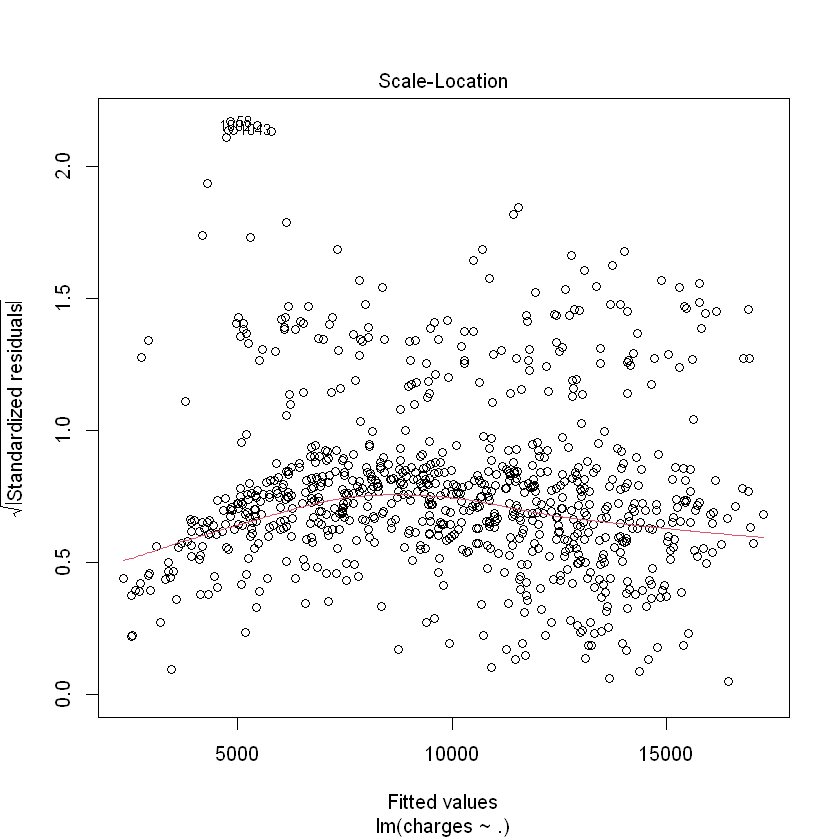

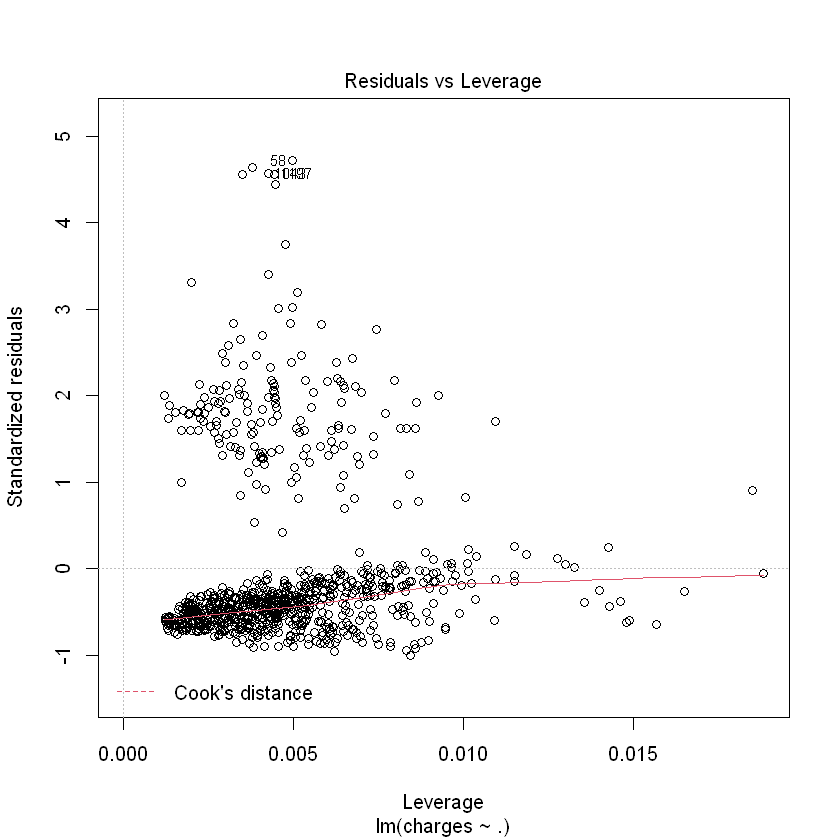

In [13]:
plot(model)

In [14]:
charges.pred <- predict(model,test)

In [15]:
results <- cbind(charges.pred,test$charges) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

In [16]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 48875975


In [17]:
mse^0.5

[1] 6991.135